
## İrem TANRIVERDİ


**1. Import pandas, numpy, matplotlib and seaborn libraries.**  
If you need another library or packages, you may upload them too.

In [1]:
from scipy import stats
import statsmodels.api as sm 
import pylab as py 
import warnings
warnings.filterwarnings('ignore')


### answer ###
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**2. Upload the data as a pandas dataframe and show the first three rows.**

In [2]:
### answer ###
data= pd.read_csv("data.csv")
data.head(3)

,number_of_room,neighbourhood,material_quality,age,distance,number_of_bathroom,area,balcony,thermal_insulation_point,air_quality,price
0,3,Moderate,B,15.01,685.0,1,97.0,yes,22.4,23.3,384.8
1,4,Moderate,D,0.19,373.0,2,180.0,no,21.1,21.2,1182.2
2,2,Moderate,C,19.37,635.0,1,135.0,yes,25.4,27.3,469.1


----------
### Data Explanation

**number_of_room:** number of room in the house    
**neighbourhood:** the score for the neighbourhood (very low, low, moderate, high, very high)    
**material_quality:** the material quality of the house    
**age:** age of the house (in years)    
**distance:** the distance to the nearest public transportation (in meters)     
**number_of_bathroom:** number of bathroom   
**area:** house area      
**balcony:** Does the house have a balcony
**thermal_insulation_point:** score for thermal insulation    
**air_quality:** air quality in the neighbourhood    
**price:** price of the house (in USD K)    
     

**3. How many features and observations are there in the data set (rows x columns)?**

In [3]:
### answer ###
data.shape

(3000, 11)

As seen there is 11 features (columns) and 3000 observations (rows) in the data set.

In [4]:
##Display number of rows, columns, etc
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number_of_room            3000 non-null   int64  
 1   neighbourhood             2988 non-null   object 
 2   material_quality          2945 non-null   object 
 3   age                       3000 non-null   float64
 4   distance                  3000 non-null   float64
 5   number_of_bathroom        3000 non-null   int64  
 6   area                      3000 non-null   float64
 7   balcony                   2684 non-null   object 
 8   thermal_insulation_point  2977 non-null   float64
 9   air_quality               3000 non-null   float64
 10  price                     3000 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 257.9+ KB


Detailed informations about data set had shown above.

### <span style="background-color:#C91414">Usually you need to deal with low quality data </span> 

**4.Change encoding of the neighbourhood, material_quality and balcony as stated below.**       
For neighbourhood; Very Low=1, Low=2, Moderate=3, High=4, Very High=5   
For material_quality; A=1, B=2, C=3, D=4   
For balcony; no=0 , yes=1  

In [3]:
### answer ###
data['balcony'] = np.where(data['balcony'] == "yes", 1, data['balcony'])
data['balcony'] = np.where(data['balcony'] == "no", 0, data['balcony'])
data.head()

,number_of_room,neighbourhood,material_quality,age,distance,number_of_bathroom,area,balcony,thermal_insulation_point,air_quality,price
0,3,Moderate,B,15.01,685.0,1,97.0,1,22.4,23.3,384.8
1,4,Moderate,D,0.19,373.0,2,180.0,0,21.1,21.2,1182.2
2,2,Moderate,C,19.37,635.0,1,135.0,1,25.4,27.3,469.1
3,3,Moderate,B,24.44,671.0,1,122.0,0,30.0,50.7,325.8
4,4,Very High,A,4.20,635.0,2,157.0,1,24.8,41.4,734.2


In [4]:
data['material_quality'] = np.where(data['material_quality'] == "A", 1, data['material_quality'])
data['material_quality'] = np.where(data['material_quality'] == "B", 2, data['material_quality'])
data['material_quality'] = np.where(data['material_quality'] == "C", 3, data['material_quality'])
data['material_quality'] = np.where(data['material_quality'] == "D", 4, data['material_quality'])
data.head()

,number_of_room,neighbourhood,material_quality,age,distance,number_of_bathroom,area,balcony,thermal_insulation_point,air_quality,price
0,3,Moderate,2,15.01,685.0,1,97.0,1,22.4,23.3,384.8
1,4,Moderate,4,0.19,373.0,2,180.0,0,21.1,21.2,1182.2
2,2,Moderate,3,19.37,635.0,1,135.0,1,25.4,27.3,469.1
3,3,Moderate,2,24.44,671.0,1,122.0,0,30.0,50.7,325.8
4,4,Very High,1,4.20,635.0,2,157.0,1,24.8,41.4,734.2


In [5]:
data['neighbourhood'] = np.where(data['neighbourhood'] == "Very Low", 1, data['neighbourhood'])
data['neighbourhood'] = np.where(data['neighbourhood'] == "Low", 2, data['neighbourhood'])
data['neighbourhood'] = np.where(data['neighbourhood'] == "Moderate", 3, data['neighbourhood'])
data['neighbourhood'] = np.where(data['neighbourhood'] == "High", 4, data['neighbourhood'])
data['neighbourhood'] = np.where(data['neighbourhood'] == "Very High", 5, data['neighbourhood'])
data.head()

,number_of_room,neighbourhood,material_quality,age,distance,number_of_bathroom,area,balcony,thermal_insulation_point,air_quality,price
0,3,3,2,15.01,685.0,1,97.0,1,22.4,23.3,384.8
1,4,3,4,0.19,373.0,2,180.0,0,21.1,21.2,1182.2
2,2,3,3,19.37,635.0,1,135.0,1,25.4,27.3,469.1
3,3,3,2,24.44,671.0,1,122.0,0,30.0,50.7,325.8
4,4,5,1,4.20,635.0,2,157.0,1,24.8,41.4,734.2


Notice that although some columns contain numerical values, sometimes they are not reflected in the describe() method. The reason of this, these columns are read as strings. If you face this problem, to fix it,  please run the below code.
> data= data.apply(pd.to_numeric)
   
Please be aware that the numeric encoding of a column does not mean that the variable/attribute itself is numerical.  


**5.Rename the name of "air_quality" column as "air_quality_score"**

In [9]:
print(data.columns) ## .columns returns the column names of the DataFrame.   

Index(['number_of_room', 'neighbourhood', 'material_quality', 'age',
       'distance', 'number_of_bathroom', 'area', 'balcony',
       'thermal_insulation_point', 'air_quality', 'price'],
      dtype='object')


In [6]:
### answer ###
data.rename({'air_quality': 'air_quality_score'}, axis=1, inplace=True)

In [9]:
data.head()

,number_of_room,neighbourhood,material_quality,age,distance,number_of_bathroom,area,balcony,thermal_insulation_point,air_quality_score,price
0,3,3,2,15.01,685.0,1,97.0,1,22.4,23.3,384.8
1,4,3,4,0.19,373.0,2,180.0,0,21.1,21.2,1182.2
2,2,3,3,19.37,635.0,1,135.0,1,25.4,27.3,469.1
3,3,3,2,24.44,671.0,1,122.0,0,30.0,50.7,325.8
4,4,5,1,4.20,635.0,2,157.0,1,24.8,41.4,734.2


Notice that some data points are missing. For example, see the value of the balcony by typing **print(data.iloc[64])**    
**6. Find and print the number of missing values in each column**

In [12]:
#print(data.iloc[64])
### answer ###
data.isna()

,number_of_room,neighbourhood,material_quality,age,distance,number_of_bathroom,area,balcony,thermal_insulation_point,air_quality_score,price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2995,False,False,False,False,False,False,False,False,False,False,False
2996,False,False,False,False,False,False,False,False,False,False,False
2997,False,False,False,False,False,False,False,False,False,False,False
2998,False,False,False,False,False,False,False,False,False,False,False


Pandas isna() function return boolean dataframe with True with the element is missing value and False when it is not a missing value.

In [10]:
number_of_missing=data.isna().sum()
number_of_missing

number_of_room                0
neighbourhood                12
material_quality             55
age                           0
distance                      0
number_of_bathroom            0
area                          0
balcony                     316
thermal_insulation_point     23
air_quality_score             0
price                         0
dtype: int64

In [11]:
percent_missing = (data.isnull().sum() / len(data))*100
missing_value_data = pd.DataFrame({ "number_of_missing":number_of_missing,
                                    'percent_missing': percent_missing})

missing_value_data

,number_of_missing,percent_missing
number_of_room,0,0.000000
neighbourhood,12,0.400000
material_quality,55,1.833333
age,0,0.000000
distance,0,0.000000
number_of_bathroom,0,0.000000
area,0,0.000000
balcony,316,10.533333
thermal_insulation_point,23,0.766667
air_quality_score,0,0.000000


As seen "balcony" variable has more than 10% missing value rate.

**7. Drop the columns which have more than %10 missing value rate.**

In [7]:
### answer ###

# Remove column name 'balcony'
data.drop(['balcony'], axis = 1, inplace=True)
data.head()

,number_of_room,neighbourhood,material_quality,age,distance,number_of_bathroom,area,thermal_insulation_point,air_quality_score,price
0,3,3,2,15.01,685.0,1,97.0,22.4,23.3,384.8
1,4,3,4,0.19,373.0,2,180.0,21.1,21.2,1182.2
2,2,3,3,19.37,635.0,1,135.0,25.4,27.3,469.1
3,3,3,2,24.44,671.0,1,122.0,30.0,50.7,325.8
4,4,5,1,4.20,635.0,2,157.0,24.8,41.4,734.2


In [8]:
# OR, we can remove balcony column as index base
#data.drop(data.columns[[7]], axis = 1, inplace = True)

**8. Create a dataframe named data_wo_na by dropping the rows which have missing values.  
What is the shape (rows x columns) of newly created data frame "data_wo_na"?**   
Please do the rest of the assignment with data_wo_na.

In [10]:
### answer ###
data_wo_na= data.dropna()
data_wo_na.shape

(2910, 10)

In [11]:
data_wo_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2910 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number_of_room            2910 non-null   int64  
 1   neighbourhood             2910 non-null   object 
 2   material_quality          2910 non-null   object 
 3   age                       2910 non-null   float64
 4   distance                  2910 non-null   float64
 5   number_of_bathroom        2910 non-null   int64  
 6   area                      2910 non-null   float64
 7   thermal_insulation_point  2910 non-null   float64
 8   air_quality_score         2910 non-null   float64
 9   price                     2910 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 250.1+ KB


Balcony variable which has missing values more than other columns (10% missing), so this variable had removed from data previosly, Now, rows which indcludes NA values have dropped out in the remaining variables. Then, 90 variables have removed, and as seen above, 2910 observations left. As seen from information table, none of the variables includes NA values anymore.

**9. Summarize and briefly interpret the data with appropriate descriptive statistics.  
Comment on the distribution of the attributes (bell-shaped, left-skewed, right-skewed, or how peaked etc.) <font color=#C91414> just by looking at descriptive statistics.</font> 
While answering Q10, you may want to revise your comments.**    
Hint: The purpose of this question is to measure whether you can comment on the distribution of data by looking at descriptive statistics. 
However, just looking at the descriptive statistics is not always enough. For this reason, it is stated that after answering Q10 (after visualizing the data), you may want to revise your comments.

**We only look at the 5-number summary statistic for numeric variables. For categorical variables like "neighbourhood", and "material_quality", we should look their frequecies.**

**Number of room and number of bathroom are discrete variables. We can look their min, max, mean values, but showing their densities is not appropriate for these two discrete variables (Because histograms and density plots show the CDF which is cumulative distriution function of the variables, and discrete variables do not have CDF).**

In [77]:
### answer ###
data_wo_na.describe()

,number_of_room,age,distance,number_of_bathroom,area,thermal_insulation_point,air_quality_score,price
count,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000
mean,2.787285,14.519753,612.227148,1.240893,111.069072,59.844811,30.618522,629.725430
std,1.023500,10.136688,89.053838,0.427699,38.516978,27.326886,11.280134,217.144912
min,1.000000,0.020000,17.000000,1.000000,35.000000,20.600000,13.900000,114.900000
25%,2.000000,5.540000,579.000000,1.000000,76.000000,27.900000,22.900000,466.575000
50%,3.000000,13.215000,638.000000,1.000000,115.000000,73.300000,27.500000,610.350000
75%,4.000000,22.740000,675.000000,1.000000,141.000000,85.475000,35.175000,764.875000
max,4.000000,45.510000,740.000000,2.000000,190.000000,91.000000,99.600000,1298.500000


- On average, there is approximetally 3 rooms. (mean is 2.78, but it does not make any sense to interpret a discrete variable as float). Standard deviation of number of room is 1.02, this means number of rooms clustered around its mean (Low standard deviation means data are clustered around the mean, and high standard deviation indicates data are more spread out). Median of the number of room is 3, that means half of the observations are below 3. As seen median of number of rooms is bigger than its mean, so we can say that this has a relatively left-skewed distribution. (Actually, mean and median is close but, there is difference even it small)

- On average, age of the houses is 14.2. Standard deviation of the age of the houses is 10, this means number of rooms are a little bit far from its mean (Low standard deviation means data are clustered around the mean, and high standard deviation indicates data are more spread out). Median of the age is 13.22, that means half of the observations are below 13.22. As seen mean of age of the houses bigger than its median, so we can say that this has a relatively right-skewed distribution.

- On average, the distance to the nearest public transportation is 612.2. Standard deviation of the distance is 89, this means distance is far from its mean (Low standard deviation means data are clustered around the mean, and high standard deviation indicates data are more spread out). Median of the distance is 638, that means half of the observations are below 638. As seen mean of distance is smaller than its median, so we can say that this has a left-skewed distribution.

- On average, there is approximetally 1 batroom in the houses. (mean is 1.24, but it does not make any sense to interpret a discrete variable as float). Standard deviation of number of bathroom is 0.42, this means number of bathrooms clustered around its mean (Low standard deviation means data are clustered around the mean, and high standard deviation indicates data are more spread out). Median of the number of room is 1, that means half of the observations are below 1. As seen median of number of rooms is bigger than its mean, so we can say that this has a relatively left-skewed distribution. (Actually, mean and median is very close but, there is small deviation)

- On average, the house area is 111.1. Standard deviation of the area is 38.52, this means area is a little bit far from its mean (Low standard deviation means data are clustered around the mean, and high standard deviation indicates data are more spread out). Median of the distance is 115, that means half of the observations are below 115. As seen mean of area is smaller than its median, so we can say that this has a left-skewed distribution.

- On average, the score for thermal insulation is 59.84. Standard deviation of the area is 27.33, this means score for thermal insulation is a little bit far from its mean (Low standard deviation means data are clustered around the mean, and high standard deviation indicates data are more spread out). Median of the score for thermal insulation is 73.3, that means half of the observations are below 73.3. As seen mean of the score for thermal insulation is smaller than its median, so we can say that this has a left-skewed distribution.

- On average, the air quality score in the neighbourhood is 30.62. Standard deviation of the air quality in the neighbourhood is 11.3, that means air quality in the neighbourhood is a little bit far from its mean (Low standard deviation means data are clustered around the mean, and high standard deviation indicates data are more spread out). Median of the air quality in the neighbourhood is 27.5, that means half of the observations are below 27.5. As seen mean of air quality in the neighbourhood is bigger than its median, so we can say that this has a right-skewed distribution.

- On average, price of the house is 629.73. Standard deviation of the price of the house is 217.14, this means score price of the house is far from its mean (Low standard deviation means data are clustered around the mean, and high standard deviation indicates data are more spread out). Median of the price of the house is 610.35, that means half of the observations are below 610.35. As seen mean of the price of the house is bigger than its median, so we can say that this has a right-skewed distribution.

Note that;
- If the distribution of data is skewed to the left, mean < median < mode
- If the distribution of data is skewed to the right, mean > median > mode
- If the distribution of data is symmetric, the mode = the median = the mean

**10. Visualize the distributions of the numeric attributes. Comment whether they are similar to Gaussian/Normal distirbution or not. Give your reasons and support them with appropriate visualization techniques.**     
Support your answer with what you found in the previous question.
Hint: You can use subplotting to see the several plots of same attribute at a one time.

<AxesSubplot:xlabel='price', ylabel='Density'>

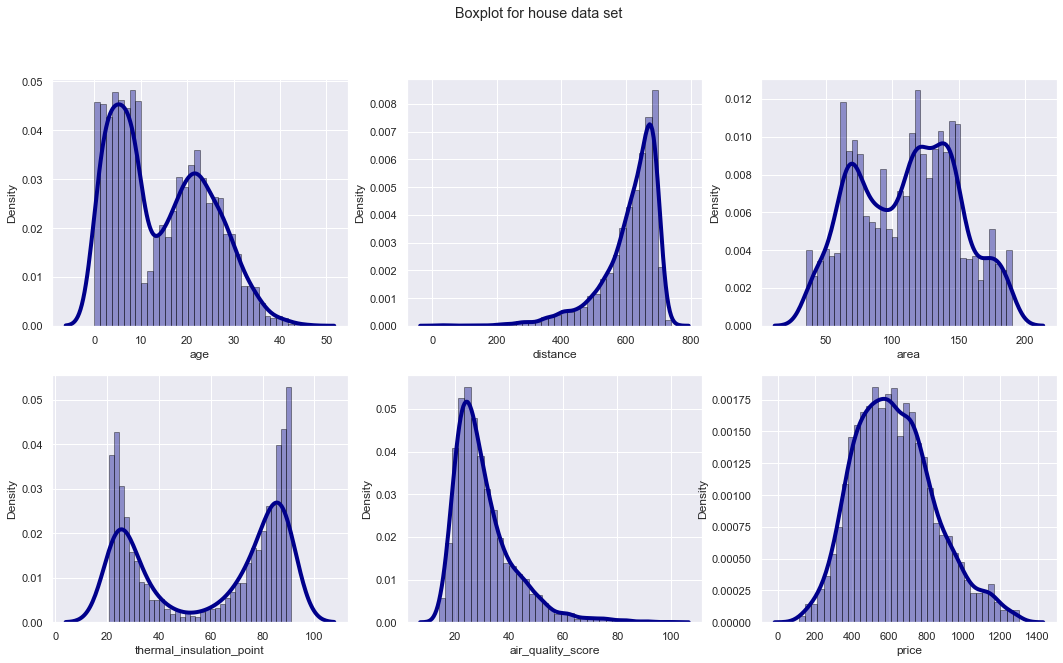

In [12]:
### answer ###
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Boxplot for house data set')

sns.distplot(data_wo_na.age, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[0, 0])

sns.distplot(data_wo_na.distance, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[0, 1])


sns.distplot(data_wo_na.area, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[0, 2])


sns.distplot(data_wo_na.thermal_insulation_point, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[1, 0])


sns.distplot(data_wo_na.air_quality_score, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[1, 1])


sns.distplot(data_wo_na.price, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[1, 2])


In statistics, a bimodal distribution is a bimodal probability distribution. These appear as distinct peaks in the probability density function.

- As seen in age variable there is two distinct peaks in the histogram, so age is not normally distributed. Its' distribution more close to bimodel distribution.

- As seen, the tail of the distance variable extends to the left, that is, it does not have a symmetrical distribution, so it cannot be normally distributed. Distance variable has left-skewed distribution.

- In histogram of the area variable, 3 peaks appear, so area variable does not distributed normally. Since there is more than 2 peaks, it may have multimodal distribution.

- In histogram of the thermal insulation point variable, 2 peaks appear, so thermal insulation point variable does not distributed normally. Since there is 2 peaks, it may have bimodal distribution.

- As seen, the tail of the air quality score variable extends to the right, that is, it does not have a symmetrical distribution, so it cannot be normally distributed. Distance variable has right-skewed distribution.

- In the histogram of the price variable, price looks like distributed symmetrically. Hence, price may have normal distribution. To be sure that we can test it with "shapiro wilk normality test" for the sample sizes smaller than 5000.

**11. For categoric attributes draw countplots and briefly comment on them.**  
Hint: You can use seaborn library. Please see the documentation via https://seaborn.pydata.org/api.html.

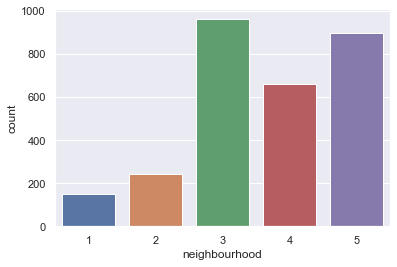

In [59]:
import seaborn as sns
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="neighbourhood", data=data_wo_na)

There is 5 levels for neigbourhood variable. While most frequent level of neigbourhood is "3", less frequent level of neigbourhood is "1".

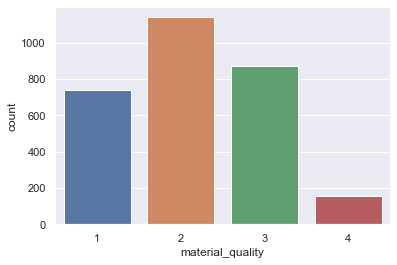

In [60]:
ax2 = sns.countplot(x="material_quality", data=data_wo_na)

There is 4 levels for material_quality variable. While most frequent level of material_quality is "2", less frequent level of material_quality is "4".

**12. Determine the appropriate descriptive location measure for each of the numerical attributes.**

Measures of central tendency are the mean, median, and mode. Each of these measures calculates the location of the central point using a different method. Choosing the appropriate measure of central tendency depends on the type of data.
In a skewed distribution, the mean can miss the mark. This problem occurs because outliers have a significant impact on the mean. As the distribution becomes more skewed, the mean go further away from the center. Consequently, **it is appropriate to use mean as a measure of the central tendency when we have a symmetric distribution**. For skewed distributions it is more appropriate to use median because median does not too much affected from the outliers (median is less sensitive to outliers). That means  the median is a robust statistic while the mean is sensitive to outliers and skewed distributions. **For ordinal data and skewed distributions we can use median.** Moreover, **we can use mode for Categorical data, Ordinal data, and Count data.**

- Distance and air quality score have skewed distribution as shown in their histogram. For distance and air quality score **median** is more appropriate.

- Price variable seems close to symmetrical distribution in its histogram, so we can use **mean** for them.

- Number of room and number of bathroom in the houses are ordinal discrete variables, so we can use both **mode** and **median** for them.

- Age and thermal insulation point have bimodel distribution and area has multimodel distribution. The unique characteristic of a bimodal distribution is that mostly in such distribution the **mean** is used as a robust sample estimator and not the median.

**13. Find out whether there are any outliers and make one suggestion regarding how to deal with them.**

<AxesSubplot:xlabel='price'>

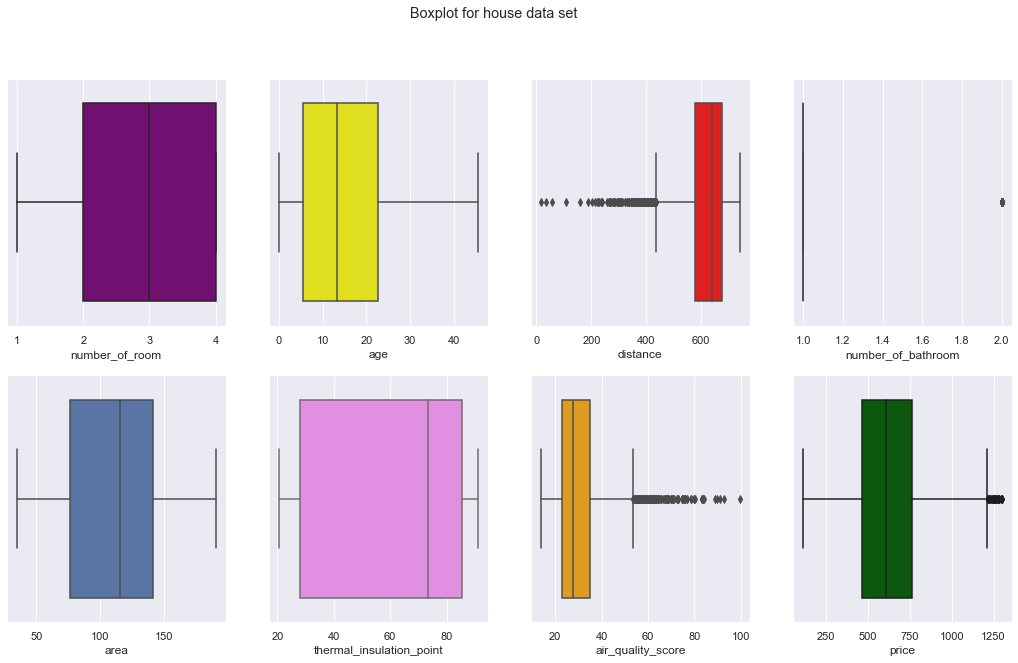

In [88]:
### answer ###
sns.set_theme(style="darkgrid")
fig2, axes = plt.subplots(2, 4, figsize=(18, 10))

fig2.suptitle('Boxplot for house data set')

sns.boxplot(ax=axes[0, 0], data=data_wo_na, x='number_of_room',color="purple")
sns.boxplot(ax=axes[0, 1], data=data_wo_na, x='age', color="yellow")
sns.boxplot(ax=axes[0, 2], data=data_wo_na, x='distance',color="red")
sns.boxplot(ax=axes[0, 3], data=data_wo_na, x='number_of_bathroom')
sns.boxplot(ax=axes[1, 0], data=data_wo_na, x='area')
sns.boxplot(ax=axes[1, 1], data=data_wo_na, x='thermal_insulation_point',color="violet")
sns.boxplot(ax=axes[1, 2], data=data_wo_na, x='air_quality_score',color="orange")
sns.boxplot(ax=axes[1, 3], data=data_wo_na, x='price',color="darkgreen")


Sometimes data for a variable will include one or more values that appear unusually large or small and out of place when compared with the other data values. These values are known as outliers and often have been erroneously included in the data set.

- There are many outliers in distance, air_quality_score and price variables.
- age, area, thermal insulation point do not have outliers.

In cases where we have a small sample size,  outliers can significantly distort all the results. Outliers may have many negative effects. There are some ways to deal with outliers.

- We can detect and remove them from the data if we sure that they are outliers and they destroy the analyses.
- We can change the values in the cases when we know the reason for the outliers.
- We can transform the data to deal with highly skewed data sets. By transforming the variables, we can eliminate the outliers by taking the natural log of a value etc.
- We can value the outliers.

**14. Visualize the distributions of all numeric attributes grouped by the "number_of_room" variable using violin plots. Comment on the results.**  
Hint: Please see the seaborn library documentation via https://seaborn.pydata.org/api.html.

<AxesSubplot:xlabel='number_of_room', ylabel='price'>

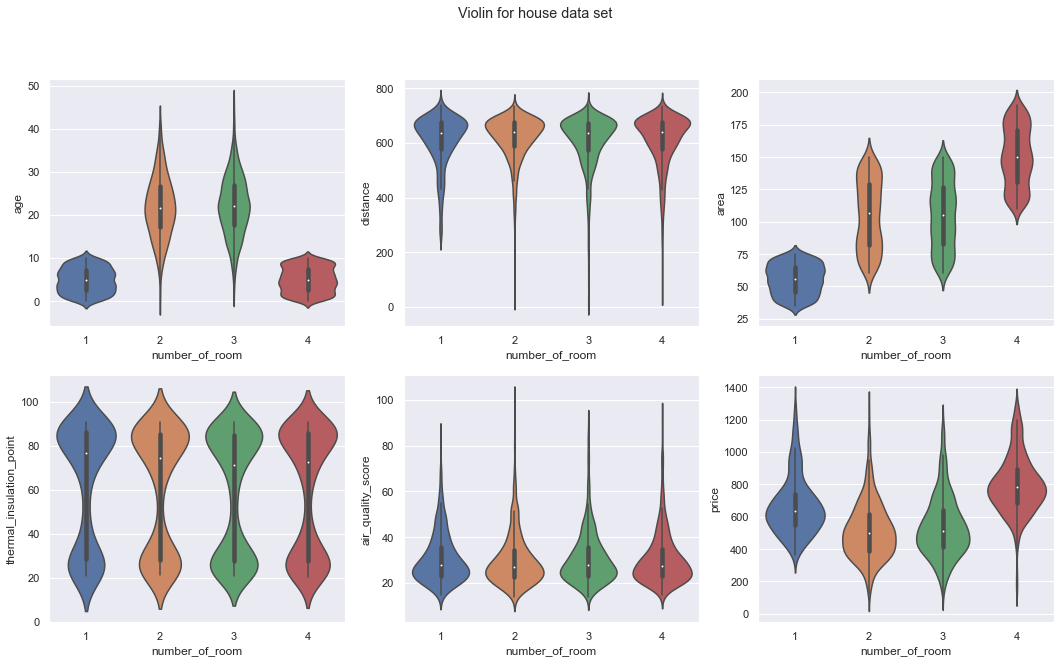

In [103]:
### answer ###
sns.set_theme(style="darkgrid")
fig3, axes = plt.subplots(2, 3, figsize=(18, 10))

fig3.suptitle('Violin for house data set')

sns.violinplot(ax=axes[0, 0], data=data_wo_na, y='age', x="number_of_room")
sns.violinplot(ax=axes[0, 1], data=data_wo_na, y='distance',x="number_of_room")
sns.violinplot(ax=axes[0, 2], data=data_wo_na, y='area',x="number_of_room")
sns.violinplot(ax=axes[1, 0], data=data_wo_na, y='thermal_insulation_point',x="number_of_room")
sns.violinplot(ax=axes[1, 1], data=data_wo_na, y='air_quality_score',x="number_of_room")
sns.violinplot(ax=axes[1, 2], data=data_wo_na, y='price',x="number_of_room")


In violin plots, the white dot represents the median, the thick gray bar in the center represents the interquartile range and
the thin gray line represents the rest of the distribution except for outliers. On each side of the gray line is a kernel density estimation to show the distribution of the data. Wider sections of the violin plot represent a higher probability that members of the population will take on the given value while the skinnier sections represent a lower probability.

- First violin plot shows the relationship of number of room to age. The box plot elements show the median age for "3 room" is higher than other number of rooms. The shape of the distribution (extremely skinny on each end and wide in the middle) indicates the age of house with 2 rooms and 3 rooms are highly concentrated around the median.

- Second violin plot shows the relationship of number of room to  the distance to the nearest public transportation. The box plot elements show the median distance for "4 room" seems higher than other number of rooms. The shape of the distribution (extremely skinny on each end and wide in the middle) indicates the distance of house with all number of rooms are highly concentrated around the median. However, range for  the each number of rooms is different. Range of the distance for the houses with 3 rooms is the largest.

- Third violin plot shows the relationship of number of room to area. The box plot elements show the median area for "4 room" is higher than other number of rooms. The shape of the distribution indicates the area of house with 4 rooms are concentrated around the median. Range of the area for the houses with 2 rooms is the largest.

- Fourth violin plot shows the relationship of number of room to thermal insulation point. The box plot elements show the median thermal insulation point for "1 room" is higher than other number of rooms. The shape of the distribution indicates the thermal insulation point concentrated minimum and maximum points not the median. Range of the thermal insulation point for the houses with 1 rooms is the largest.

- Fifth violin plot shows the relationship of number of room to  the  air quality score in the neighbourhood. The box plot elements show the median distance for "3 room" seems higher than other number of rooms. The shape of the distribution (extremely skinny on each end and wide in the middle) indicates the air quality score of house with all number of rooms are highly concentrated around the median. However, range for  the each number of rooms is different. Range of the air quality score for the houses with 2 rooms is the largest.

- Sixth violin plot shows the relationship of number of room to price of the house. The box plot elements show the median price for "4 room" is higher than other number of rooms. The shape of the distribution indicates the price of the house with 1 and 4 rooms more concentrated around median. Range of the price for the houses with 4 rooms seems the largest.

**15. What does the below violin plot show? Explain.**

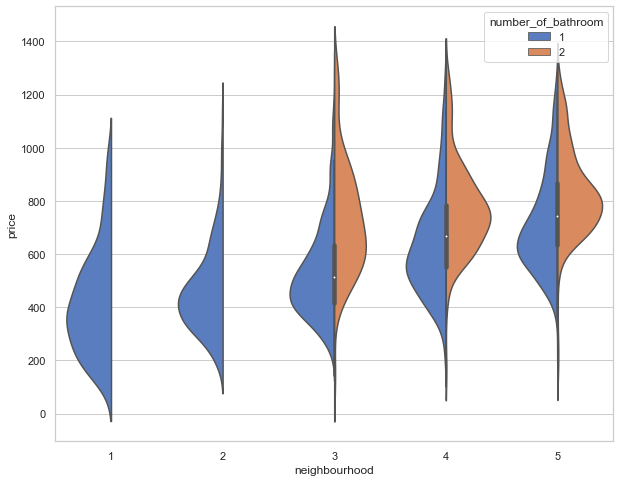

In [17]:
### answer ###
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x="neighbourhood",y="price", hue="number_of_bathroom",  data=data_wo_na, palette="muted", split=True)


This split violins compare the distributions of each group. 
- It is noticed that price of the houses with 1 bathroom and 3rd neighbourhood more concentrated around mean compared with houses with 2 bathroom. Price with 2 bathroom and 3rd neighbourhood have a long-tail distribution above the third quartile.

- The price of the houses with 1 bathroom and 4th neighbourhoodhave a long-tail distribution below the first quartile, whereas 2 bathroom have a long-tail above the third quartile.

- The price of the houses with 1 bathroom and 5th neighbourhoodhave a long-tail distribution below the first quartile, whereas 2 bathroom more concetrated around median.

- There is only 1 bathroom in 1st and 2nd neigbourhood.

**16. Let's first create an array which has an exponential distribution. The code below is an example, you can change the parameters as you want or leave it as is.**

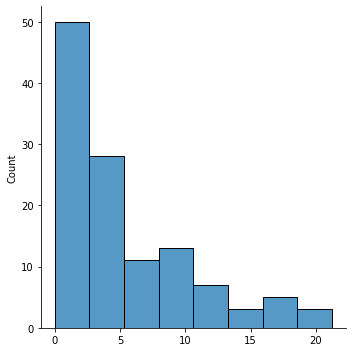

In [3]:
np.random.seed(5) # for reproducibility
array= np.random.exponential(scale=5,size=120)
sns.displot(array)

take_samples_from_given_data_calculate_mean: This function takes a sample from the given data with the specified sample size, then calculates the mean of this sample.
For example, take_samples_from_given_data_calculate_mean(array,3) it takes three elements of the array randomly and calculates the mean of them.
Let's take samples from array n=10 times and visualize the distribution of the means of these samples.


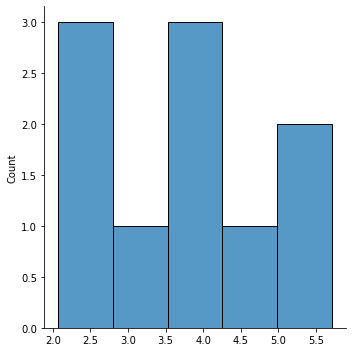

In [4]:
def take_samples_from_given_data_calculate_mean(data, sample_size):
    sample=np.random.choice(data,sample_size, replace=False)
    return np.mean(sample)

n=10
samples_mean_list=[]
for i in range (n):
    samples_mean_list.append(take_samples_from_given_data_calculate_mean(data=array,sample_size=7))  
sns.displot(samples_mean_list)

Now repeat this visualization step for  n=50, n=100, n=500 and n=5000 and comment on your findings.

In [15]:
# n=10
n=10
samples_mean_list=[]
for i in range (n):
    samples_mean_list.append(take_samples_from_given_data_calculate_mean(data=array,sample_size=7))  

# n=50
n2=50
samples_mean_list2=[]
for i in range (n2):
    samples_mean_list2.append(take_samples_from_given_data_calculate_mean(data=array,sample_size=7))  

# n=100
n3=100
samples_mean_list3=[]
for i in range (n3):
    samples_mean_list3.append(take_samples_from_given_data_calculate_mean(data=array,sample_size=7))  

# n=500
n4=500
samples_mean_list4=[]
for i in range (n4):
    samples_mean_list4.append(take_samples_from_given_data_calculate_mean(data=array,sample_size=7))  

# n= 5000
n5=5000
samples_mean_list5=[]
for i in range (n5):
    samples_mean_list5.append(take_samples_from_given_data_calculate_mean(data=array,sample_size=7))  
    
    
# n=500000
n6=5000000
samples_mean_list6=[]
for i in range (n6):
    samples_mean_list6.append(take_samples_from_given_data_calculate_mean(data=array,sample_size=7))  


[Text(0.5, 1.0, 'n=500000')]

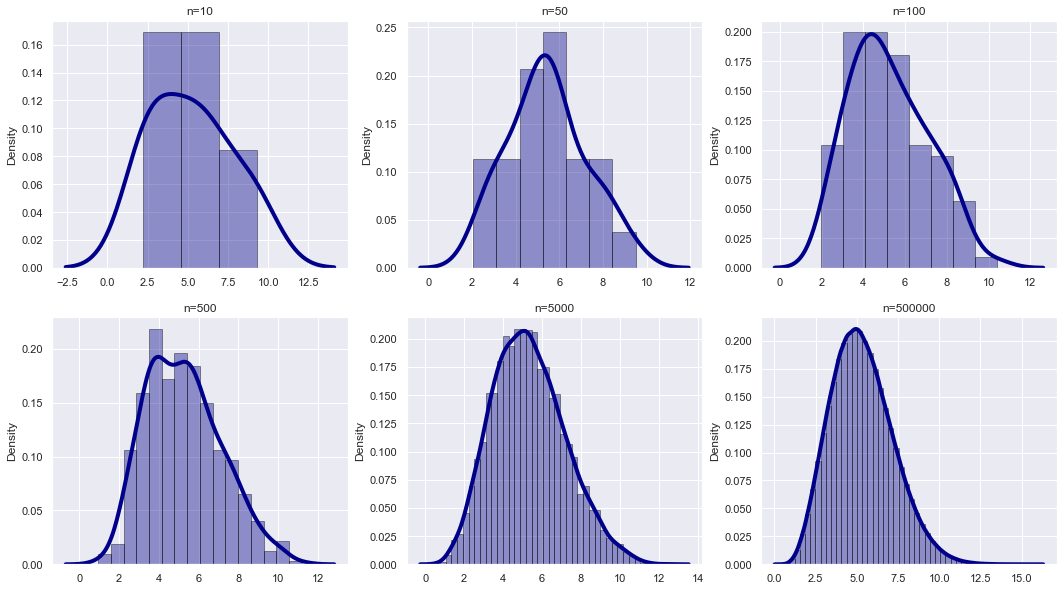

In [16]:
### answer ###
sns.set_theme(style="darkgrid")
fig4, axes = plt.subplots(2, 3, figsize=(18, 10))


sns.distplot(samples_mean_list, hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[0, 0]).set(title="n=10")

sns.distplot(samples_mean_list2, hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[0, 1]).set(title="n=50")


sns.distplot(samples_mean_list3, hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[0, 2]).set(title="n=100")


sns.distplot(samples_mean_list4, hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[1, 0]).set(title="n=500")


sns.distplot(samples_mean_list5, hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[1, 1]).set(title="n=5000")

sns.distplot(samples_mean_list6, hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[1, 2]).set(title="n=500000")



The figure above, explores the effect of varying sample sizes on sample mean. As we saw for sampling from the exponential distribution, as the sample size increases the mean of the sample becomes more and more similar to the normal distribution. This comes from central limit theorem (CLT). The central limit theorem states that the sampling distribution of the mean approaches a normal distribution, as the sample size increases.